(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

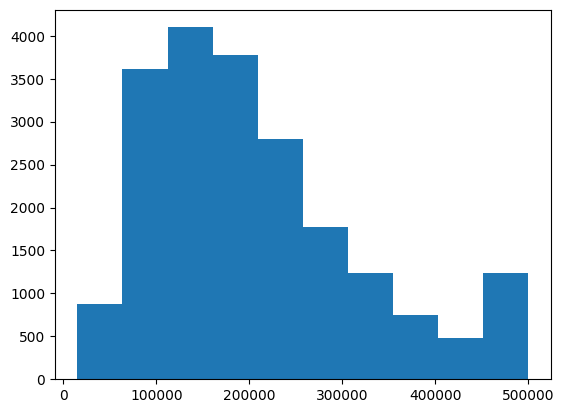

In [23]:
import pandas as pd
import numpy  as np
from matplotlib  import pyplot as plt
df = pd.read_csv('housing.csv')
plt.hist(df['median_house_value'])

In [24]:
# q1
col = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df_file = df.query(" ocean_proximity in ('<1H OCEAN','INLAND') ")[col]
df_file.median_house_value =np.log1p(df_file.median_house_value)
df_file.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [25]:
# Q2
df_file.describe()['population']

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [26]:
# Q3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



train,test = train_test_split(df_file,test_size=0.4,shuffle=True,random_state=42)
test,val = train_test_split(test,test_size=0.5,shuffle=True,random_state=42)

train_fill0 = train.fillna(0)
train_fillmean = train.fillna(train.total_bedrooms.mean())

train_y = train_fill0.median_house_value.values
train_X = train_fill0.drop('median_house_value',axis=1)
train_ymean = train_fillmean.median_house_value.values
train_Xmean = train_fillmean.drop('median_house_value',axis=1)

model_a = LinearRegression()
model_a = model_a.fit(train_X,train_y)
model_b = LinearRegression()
model_b = model_b.fit(train_Xmean,train_ymean)

val0 = val.fillna(0)
valmean = val.fillna(val.total_bedrooms.mean())

val_y = val0.median_house_value.values
val_X = val0.drop('median_house_value',axis=1)

val_y_mean = valmean.median_house_value.values
val_X_mean = valmean.drop('median_house_value',axis=1)

pred= model_a.predict(val_X)
pred2= model_b.predict(val_X_mean)
print(mean_squared_error(pred,val_y,squared=True).round(2))
print(mean_squared_error(pred2,val_y_mean,squared=True).round(2))

0.11
0.11


In [31]:
# Q4
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
import numpy  as np


train,test = train_test_split(df_file,test_size=0.4,shuffle=True,random_state=42)
test,val = train_test_split(test,test_size=0.5,shuffle=True,random_state=42)

train_fill0 = train.fillna(0)

train_y = train_fill0.median_house_value.values
train_X = train_fill0.drop('median_house_value',axis=1)

val0 = val.fillna(0)
val_y = val0.median_house_value.values
val_X = val0.drop('median_house_value',axis=1)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:       

    model_a = Ridge(alpha=r)
    model_a = model_a.fit(train_X,train_y)      
    pred= model_a.predict(val_X)
    print(r)
    print(mean_squared_error(pred,val_y,squared=True).round(6))
    print('--------------')

0
0.113752
--------------
1e-06
0.113752
--------------
0.0001
0.113752
--------------
0.001
0.113752
--------------
0.01
0.113752
--------------
0.1
0.113752
--------------
1
0.113751
--------------
5
0.113749
--------------
10
0.113745
--------------


In [37]:
# Q5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
import numpy  as np
rmse_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    train,test = train_test_split(df_file,test_size=0.4,shuffle=True,random_state=seed)
    test,val = train_test_split(test,test_size=0.5,shuffle=True,random_state=seed)

    train_fill0 = train.fillna(0)

    train_y = train_fill0.median_house_value.values
    train_X = train_fill0.drop('median_house_value',axis=1)

    val0 = val.fillna(0)
    val_y = val0.median_house_value.values
    val_X = val0.drop('median_house_value',axis=1)
    model_a = LinearRegression()
    model_a = model_a.fit(train_X,train_y)
    pred= model_a.predict(val_X)
    rmseval = mean_squared_error(pred,val_y,squared=True)
    rmse_list.append(rmseval)

np.std(rmse_list).round(3)

0.004

In [52]:
# Q6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
import numpy  as np


train,test = train_test_split(df_file,test_size=0.4,shuffle=True,random_state=9)
test,val = train_test_split(test,test_size=0.5,shuffle=True,random_state=9)



train_y = pd.concat([train,val]).median_house_value.values
train_X = pd.concat([train,val]).drop('median_house_value',axis=1)

train_X= train_X.fillna(0)

test_0 = test.fillna(0)
test_y = test_0.median_house_value.values
test_x = test_0.drop('median_house_value',axis=1)

model_a = Ridge(alpha=0.01)
model_a = model_a.fit(train_X,train_y)

pred= model_a.predict(test_x)
rmseval = mean_squared_error(pred,test_y,squared=True)
rmseval.round(2)

0.12